CS573100 Music Information Retrieval

DDL: 2023.5.9.

Description: Homework 2. Intrument and pitch classification.

Requirements:
1. Name you file as HW2_{student-id}.ipynb and submit to eeclass.
2. Strongly recommend writing the report on your jupyter notebook file.

In [1]:
print("============查看cpu配置================")
# 查看cpu配置
%cat /proc/cpuinfo | grep model\ name

============查看cpu配置================
model name	: Intel(R) Xeon(R) Platinum 8272CL CPU @ 2.60GHz
model name	: Intel(R) Xeon(R) Platinum 8272CL CPU @ 2.60GHz
model name	: Intel(R) Xeon(R) Platinum 8272CL CPU @ 2.60GHz
model name	: Intel(R) Xeon(R) Platinum 8272CL CPU @ 2.60GHz


In [7]:
%pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 83.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 MB 16.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 94.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 14.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [9]:
%pip install mirdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 77.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 103.0 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 35.9 MB/s eta 0:00:00
  Preparing

In [11]:
%pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 960.3 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 72.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.2 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 55.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━

In [12]:
import librosa
import tensorflow as tf


# Load TinySOL metadata
# Import mirdata library
import mirdata

# Initialize tinysol dat

tinysol_dataset = mirdata.initialize("tinysol")
tinysol_dataset.download()
# Load tinysol metadata
tinysol_metadata = tinysol_dataset._metadata




2023-05-08 11:32:41.971932: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-08 11:32:43.314596: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO: Downloading ['audio', 'annotations'] to /home/azureuser/mir_datasets/tinysol
INFO: [audio] downloading TinySOL.tar.gz
979MB [04:46, 3.58MB/s]                               
INFO: [annotations] downloading TinySOL_metadata.csv
312kB [00:01, 160kB/s]                             


#Feature Extraction

In [44]:
import numpy as np
# Create empty lists to store MFCC features and labels
mfccs_list = []
instrument_list = []
pitch_list = []

# Iterate through all the tracks in the dataset
for track_id in tinysol_dataset.track_ids:

  # Load a track by its ID
  track = tinysol_dataset.track(track_id)

  # Print some track information
  print("Track ID:", track.track_id)
  print("Instrument name:", track.instrument_full)
  print("Pitch class:", track.pitch)
  #print("Dynamics:", track.dynamics)

  # Load and play the audio file of the track
  audio, sr = track.audio
  #track.play_audio()

  # TODO:  IMPLEMENT FEATURE EXTRACTION
  mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=256)
  mfccs_m=np.mean(mfccs,axis=1)
  # for i in range(mfccs.shape[1]):
  #       mfccs_list.append(mfccs[:, i])
  #       instrument_list.append(track.instrument_full)
  #       pitch_list.append(track.pitch)
  # Append the MFCC features and labels to the lists
  mfccs_list.append(mfccs_m)
  instrument_list.append(track.instrument_full)
  pitch_list.append(track.pitch)
# Convert the lists to numpy arrays for tensorflow compatibility
mfccs_array = np.array(mfccs_list)
instrument_array = np.array(instrument_list)
pitch_array = np.array(pitch_list)






Track ID: BTb-ord-F#1-pp-N-N
Instrument name: Bass Tuba
Pitch class: F#1
Track ID: BTb-ord-G1-pp-N-R100u
Instrument name: Bass Tuba
Pitch class: G1
Track ID: BTb-ord-G#1-pp-N-T16u
Instrument name: Bass Tuba
Pitch class: G#1
Track ID: BTb-ord-A1-pp-N-T23d
Instrument name: Bass Tuba
Pitch class: A1
Track ID: BTb-ord-A#1-pp-N-N
Instrument name: Bass Tuba
Pitch class: A#1
Track ID: BTb-ord-B1-pp-N-N
Instrument name: Bass Tuba
Pitch class: B1
Track ID: BTb-ord-C2-pp-N-T13d
Instrument name: Bass Tuba
Pitch class: C2
Track ID: BTb-ord-C#2-pp-N-N
Instrument name: Bass Tuba
Pitch class: C#2
Track ID: BTb-ord-D2-pp-N-T18u
Instrument name: Bass Tuba
Pitch class: D2
Track ID: BTb-ord-D#2-pp-N-T11u
Instrument name: Bass Tuba
Pitch class: D#2
Track ID: BTb-ord-E2-pp-N-T25u
Instrument name: Bass Tuba
Pitch class: E2
Track ID: BTb-ord-F2-pp-N-T25u_R100u
Instrument name: Bass Tuba
Pitch class: F2
Track ID: BTb-ord-F#2-pp-N-T14u
Instrument name: Bass Tuba
Pitch class: F#2
Track ID: BTb-ord-G2-pp-N-N
Ins

In [45]:
# Convert the lists to numpy arrays for tensorflow compatibility[^2^][2] [^3^][3]
mfccs_array = np.array(mfccs_list)
instrument_array = np.array(instrument_list)
pitch_array = np.array(pitch_list)

#Encode labels

In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
instrument_array = le.fit_transform(instrument_array)
instr_classes = le.classes_
print(instr_classes)
pitch_array = le.fit_transform(pitch_array)
pitch_classes = le.classes_
print(pitch_classes)

['Accordion' 'Alto Saxophone' 'Bass Tuba' 'Bassoon' 'Cello'
 'Clarinet in Bb' 'Contrabass' 'Flute' 'French Horn' 'Oboe' 'Trombone'
 'Trumpet in C' 'Viola' 'Violin']
['A#1' 'A#2' 'A#3' 'A#4' 'A#5' 'A#6' 'A#7' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6'
 'A7' 'B1' 'B2' 'B3' 'B4' 'B5' 'B6' 'B7' 'C#2' 'C#3' 'C#4' 'C#5' 'C#6'
 'C#7' 'C#8' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'D#2' 'D#3' 'D#4' 'D#5'
 'D#6' 'D#7' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'E1' 'E2' 'E3' 'E4' 'E5' 'E6'
 'E7' 'F#1' 'F#2' 'F#3' 'F#4' 'F#5' 'F#6' 'F#7' 'F1' 'F2' 'F3' 'F4' 'F5'
 'F6' 'F7' 'G#1' 'G#2' 'G#3' 'G#4' 'G#5' 'G#6' 'G#7' 'G1' 'G2' 'G3' 'G4'
 'G5' 'G6' 'G7']


#Split Training Set and Testing Set 

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_instrument, y_test_instrument, y_train_pitch, y_test_pitch = train_test_split(
    mfccs_array, instrument_array, pitch_array,test_size=0.2, random_state=23) # DON'T Modify Random_state!


INFO: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO: sklearn.model_selection.train_test_split: running accelerated version on CPU
INFO: sklearn.model_selection.train_test_split: running accelerated version on CPU


In [18]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 70.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(40, 30))

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

##Instrument Classification

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [53]:
# Import scikit-learn library for SVM model and K-fold cross-validation
from sklearn.svm import SVC
from sklearn.model_selection import KFold
# param = {'criterion':['gini'],'max_depth':[30,50,60,100,120],'min_samples_leaf':[2,3,5,10,12],'min_impurity_decrease':[0.1,0.2,0.5]}
param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}
# Create a model for Intstrument Classification
clf =GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=5,scoring='accuracy')
# model = DecisionTreeClassifier()
# model = MLPClassifier(random_state=1, max_iter=300)
# Perform K-fold cross-validation 
# kfold = KFold(n_splits=6)
# for train_index, val_index in kfold.split(X_train):
#   X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
#   y_train_kfold_instrument, y_val_kfold_instrument = y_train_instrument[train_index], y_train_instrument[val_index]

  # TODO: Train your model using the train subset
clf.fit(X_train, y_train_instrument)
  # TODO:　Evaluate your model  using the validation subset
  # y_val_pred_instr = model.predict(X_val_kfold)
  # print("Validation score:", accuracy_score(y_test_instrument, y_val_pred_instr))

# TODO: Evaluate your model using the test set
y_pred_instr = clf.predict(X_test)
# accuracy_score(y_test_pitch, y_pred_pitch)
print("Test score:", accuracy_score(y_test_instrument, y_pred_instr))

INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: run

Test score: 0.7890222984562607


In [54]:
print("Best Parameters: ", clf.best_params_)
print("CV Accuracy: {:.2f}%".format(clf.best_score_*100))

Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
CV Accuracy: 77.38%


In [ ]:

accuracy = accuracy_score(y_test_instrument, y_pred_instr)
recall = recall_score(y_test_instrument, y_pred_instr, average='micro') #can try other ave method
precision = precision_score(y_test_instrument, y_pred_instr, average='micro')
cm = confusion_matrix(y_test_instrument, y_pred_instr)
plot_confusion_matrix(cm , instr_classes,normalize=True)
print('ACC = ',  round(accuracy,3))
print('precision = ', round(precision,3))
print('recall = ', round(recall, 3))

##Pitch Classification

In [55]:
# Create a model for Pitch Classification
# model = DecisionTreeClassifier()


param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

clf =GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=5,scoring='accuracy')
# Perform K-fold cross-validation 
# kfold = KFold(n_splits=6)
# for train_index, val_index in kfold.split(X_train):
  # Get the train and validation subsets
  # X_train_kfold, X_val_kfold = X_train[train_index], X_train[val_index]
  # y_train_kfold_pitch, y_val_kfold_pitch = y_train_pitch[train_index], y_train_pitch[val_index]
  # TODO: Train your model using the train subset
clf.fit(X_train, y_train_pitch)
  # TODO:　Evaluate your model  using the validation subset
  # y_val_pred_pitch = model.predict(X_val_kfold)
  # print("Validation score:", score)

# TODO: Evaluate the model on the instrument label using the test set
y_pred_pitch = clf.predict(X_test)
# accuracy_score(y_test_pitch, y_pred_pitch)
print("Test score:", accuracy_score(y_test_pitch, y_pred_pitch))

/anaconda/envs/jupyter_env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO: sklearn.utils.

Test score: 0.8970840480274442


In [56]:
print("Best Parameters: ", clf.best_params_)
print("CV Accuracy: {:.2f}%".format(clf.best_score_*100))

Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV Accuracy: 87.85%


Normalized confusion matrix


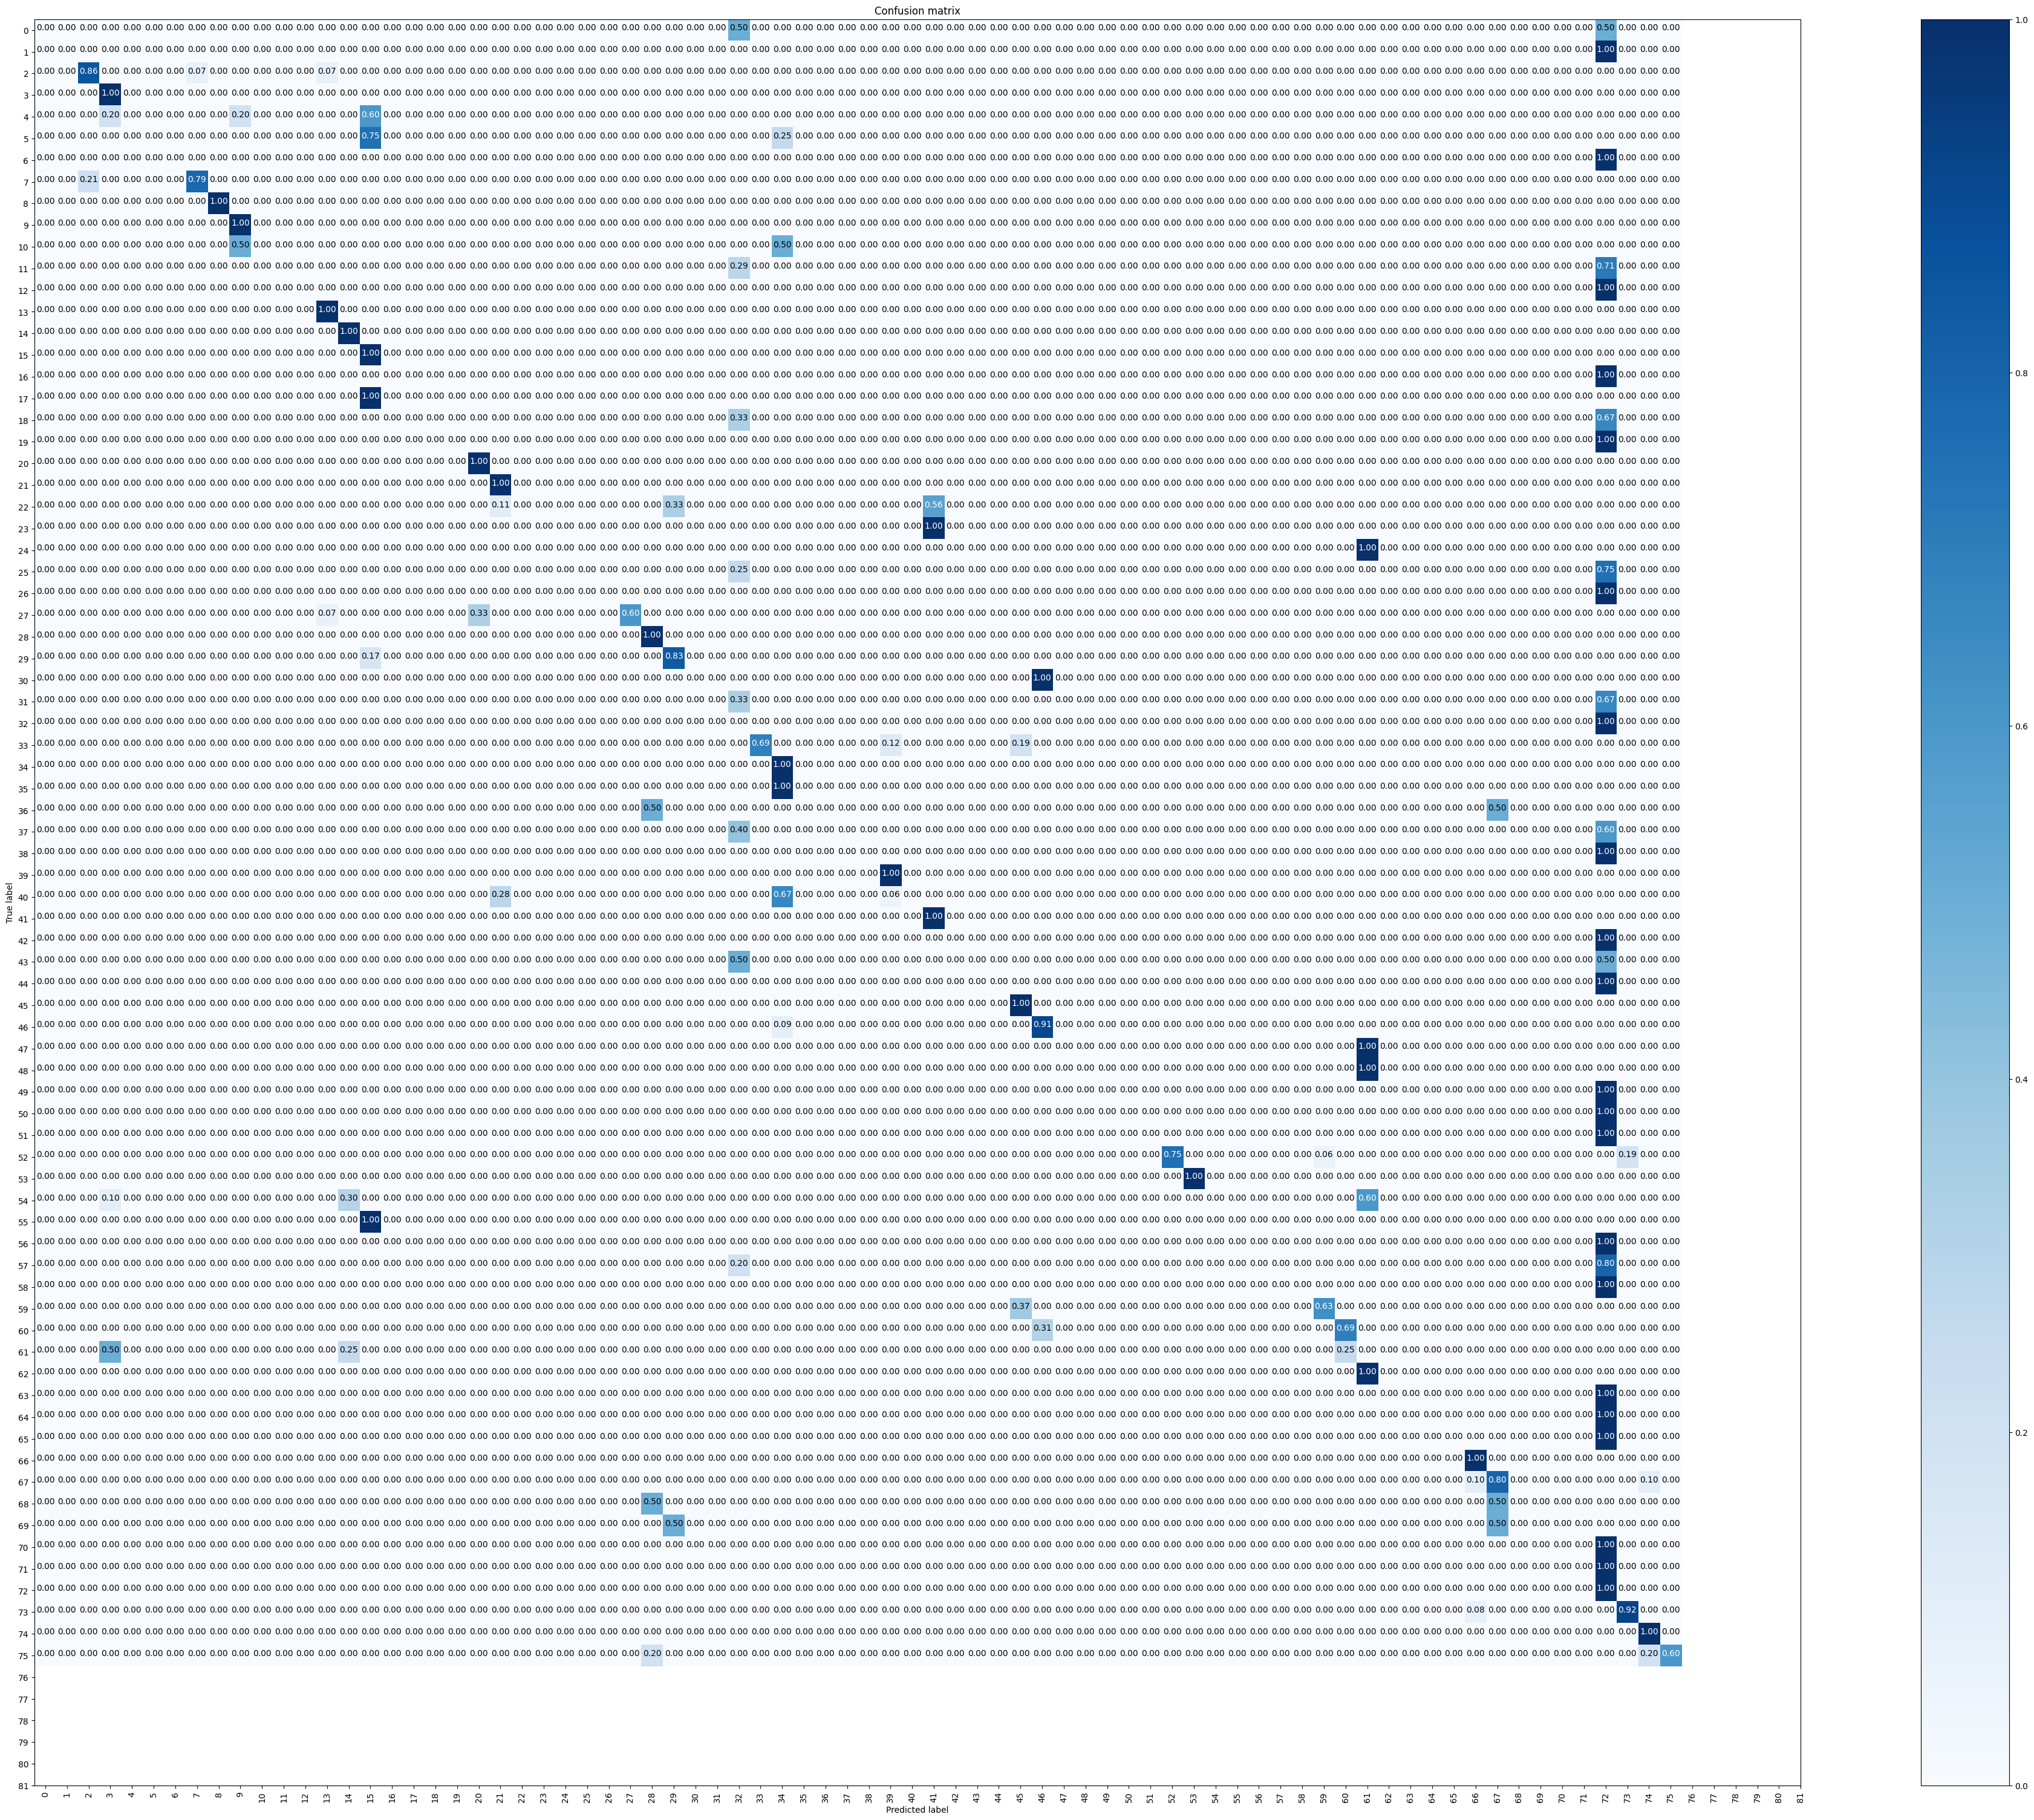

ACC =  0.513
precision =  0.5128644939965694
recall =  0.5128644939965694


In [31]:
# y_pred_pitch = svm_pitch.predict(X_test)

le = preprocessing.LabelEncoder()
le.fit(y_pred_pitch)

accuracy = accuracy_score(y_test_pitch, y_pred_pitch)
recall = recall_score(y_test_pitch, y_pred_pitch, average='micro') #can try other ave method
precision = precision_score(y_test_pitch, y_pred_pitch, average='micro')
cm = confusion_matrix(y_test_pitch, y_pred_pitch)
plot_confusion_matrix(cm , pitch_classes,normalize=True)
print('ACC = ',  round(accuracy,3))
print('precision = ', precision)
print('recall = ', recall)